In [2]:
import pandas as pd
import altair as alt

In [31]:
df = pd.read_csv("http://opendata.auth-6f31f706db6f4a24b55f42a6a79c5086.storage.sbg5.cloud.ovh.net/2019-02-06/LA_TRANSITION_ECOLOGIQUE.csv")

In [118]:
df.drop([
    "Et qui doit selon vous se charger de vous proposer ce type de solutions alternatives ?",
    "Y a-t-il d'autres points sur la transition écologique sur lesquels vous souhaiteriez vous exprimer ?",
    "Qu'est-ce qui pourrait vous inciter à changer vos comportements comme par exemple mieux entretenir et régler votre chauffage, modifier votre manière de conduire ou renoncer à prendre votre véhicule pour de très petites distances ?",
    "Que faudrait-il faire selon vous pour apporter des réponses à ce problème ?",
    "Que pourrait faire la France pour faire partager ses choix en matière d'environnement au niveau européen et international ?",
    "Quel est aujourd'hui pour vous le problème concret le plus important dans le domaine de l'environnement ?",
    "Quelles seraient pour vous les solutions les plus simples et les plus supportables sur un plan financier pour vous inciter à changer vos comportements ?",
    "Si oui, de quelle manière votre vie quotidienne est-elle touchée par le changement climatique ?",
    "Si oui, que faites-vous aujourd'hui pour protéger l'environnement et/ou que pourriez-vous faire ?",
    "Si oui, que faudrait-il faire pour vous convaincre ou vous aider à utiliser ces solutions alternatives ?",
    "Si oui, que faudrait-il faire pour vous convaincre ou vous aider à changer de mode de chauffage ?",
    "Si non, quelles sont les solutions de mobilité alternatives que vous souhaiteriez pouvoir utiliser ?"
    ],
    axis=1,
    errors="ignore",
    inplace=True
)

In [88]:
df2 = df.melt(
    id_vars=["reference", "title", "createdAt", "publishedAt", "updatedAt", "trashed", "trashedStatus", "authorId", "authorType", "authorZipCode"],
    var_name="question",
    value_name="reponse"
)

In [90]:
df2.head()

,reference,title,createdAt,publishedAt,updatedAt,trashed,trashedStatus,authorId,authorType,authorZipCode,question,reponse
0,2-4,transition écologique,2019-01-22 09:37:49,2019-01-22 09:37:49,NaN,False,NaN,VXNlcjoxMTQwMTc0YS0xZTFmLTExZTktOTRkMi1mYTE2M2...,Citoyen / Citoyenne,97231,Diriez-vous que votre vie quotidienne est aujo...,NaN
1,2-5,La surpopulation,2019-01-22 09:39:33,2019-01-22 09:39:33,NaN,False,NaN,VXNlcjpjOWYxZWQ1NS0xYzEwLTExZTktOTRkMi1mYTE2M2...,Citoyen / Citoyenne,57000,Diriez-vous que votre vie quotidienne est aujo...,NaN
2,2-6,climat,2019-01-22 09:39:50,2019-01-22 09:39:50,NaN,False,NaN,VXNlcjozZjlhNzAwOS0xYTc2LTExZTktOTRkMi1mYTE2M2...,Citoyen / Citoyenne,34140,Diriez-vous que votre vie quotidienne est aujo...,Non
3,2-7,POLLUTION AIR EAU,2019-01-22 09:40:19,2019-01-22 09:40:19,NaN,False,NaN,VXNlcjozOWQwNzJjNC0xZDEwLTExZTktOTRkMi1mYTE2M2...,Citoyen / Citoyenne,17400,Diriez-vous que votre vie quotidienne est aujo...,Non
4,2-8,Economie vs Ecologie,2019-01-22 09:41:33,2019-01-22 09:41:33,NaN,False,NaN,VXNlcjo3M2YxN2NlZS0xZDRiLTExZTktOTRkMi1mYTE2M2...,Citoyen / Citoyenne,35430,Diriez-vous que votre vie quotidienne est aujo...,Oui


In [115]:
brut = df2.groupby(["question", "reponse"]).count()

brut.drop(brut.columns.difference(['reference']), axis=1, inplace=True)

In [116]:
pct = brut.groupby(level=0).apply(lambda x: 100 * x / float(x["reference"].sum()))

pct

reference
question                                           reponse                                                      
Avez-vous pour vos déplacements quotidiens la p... Je n'utilise pas la voiture pour des déplacemen...  21.071546
                                                   Non                                                 38.542303
                                                   Oui                                                 40.386151
Diriez-vous que votre vie quotidienne est aujou... Non                                                 34.917331
                                                   Oui                                                 65.082669
Par rapport à votre mode de chauffage actuel, p... Non                                                 40.272053
                                                   Oui                                                 59.727947
À titre personnel, pensez-vous pouvoir contribu... Non                                                  6.311939
                                                   Oui                                                 93.688061

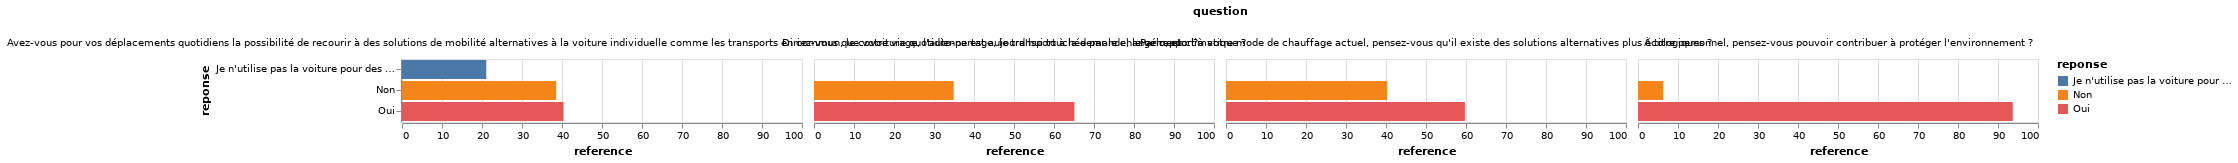

In [117]:
alt.Chart(pct.reset_index()).mark_bar().encode(
    x="reference:Q",
    y="reponse:N",
    color="reponse:N",
    column="question:N"
)